Aikasarjojen esittäminen Pythonilla.

Ladattiin ensin Nesteen päätöskurssit viimeisen kahden vuoden ajalta ja OMXH25 indeksin arvot vuodesta 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Avataan tiedostot, lisätään aikaleimat ja järjestetään aikajärjestykseen

In [2]:
# Avataan tiedostot
neste = pd.read_csv('http://myy.haaga-helia.fi/~a1604444/Rahotuksen-Excel/Neste.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10])
indeksi = pd.read_csv('http://myy.haaga-helia.fi/~a1604444/Rahotuksen-Excel/Indeksi.csv', sep = ';', decimal = ',', usecols = [0,1,2,3])

# Lisätään aikaleimat

neste.index = pd.to_datetime(neste['Date'], dayfirst = True)
indeksi.index = pd.to_datetime(indeksi['Date'], dayfirst = True)

# Järjestetään vanhimmasta uusimpaan
neste.sort_index(inplace = True)
indeksi.sort_index(inplace = True)

In [3]:
# Ensimmäiset rivit
neste.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2017-03-22,22.3.2017,12.110,12.117,11.780,12.120,11.773,12.097,11.971,3427125.427,41023215.93,7928
2017-03-23,23.3.2017,12.127,12.137,12.113,12.177,11.940,12.160,12.092,1916605.917,23175869.95,4651
2017-03-24,24.3.2017,12.057,12.063,12.167,12.180,12.010,12.087,12.097,1279636.280,15479979.37,3013
2017-03-27,27.3.2017,11.983,11.990,12.047,12.050,11.910,11.990,11.982,1374178.374,16465539.80,2927
2017-03-28,28.3.2017,12.057,12.063,11.987,12.090,11.953,12.070,12.038,1261228.261,15182499.76,2968


In [4]:
# Ensimmäiset rivit
indeksi.head()

,Date,High price,Low price,Closing price
Date,,,,
2015-01-02,2.1.2015,3022.43,2993.02,3007.11
2015-01-05,5.1.2015,3023.03,2947.22,2947.53
2015-01-07,7.1.2015,2961.35,2920.84,2929.82
2015-01-08,8.1.2015,2986.39,2952.31,2985.03
2015-01-09,9.1.2015,3001.76,2958.82,2968.38


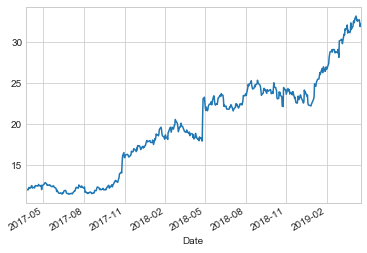

In [5]:
# Piirretään Nesteen viivakuvio
neste['Closing price'].plot()

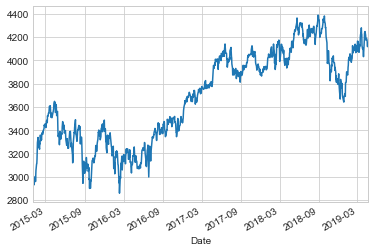

In [6]:
# Piirretään Indeksin viivakuvio
indeksi['Closing price'].plot()

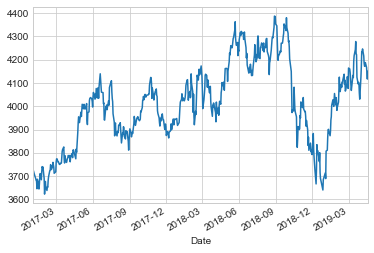

In [7]:
#Muutetaan ajankohta
indeksi['Closing price']['2017-01-01':].plot()

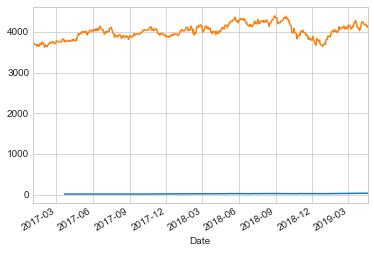

In [8]:
neste['Closing price']['2017-01-01':].plot()
indeksi['Closing price']['2017-01-01':].plot()

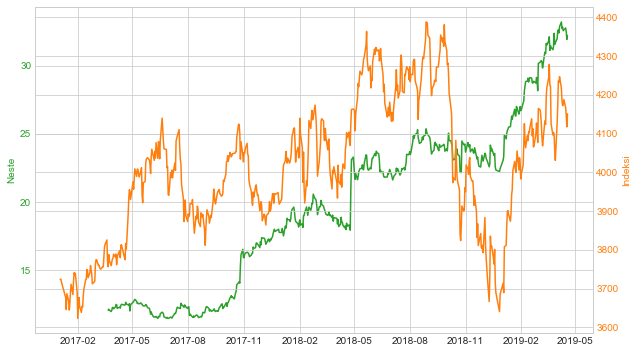

In [12]:
# luodaan figure- ja axes-oliot.
fig1, ax1 = plt.subplots(figsize = (10,6))
                
# Määritetään ax1-olio:
color = 'C2'
ax1.set_ylabel('Neste', color=color)
ax1.plot(neste['Closing price']['2017-01-01':], color=color)
ax1.tick_params(axis='y',labelcolor=color)

# Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Indeksi', color=color)
ax2.plot(indeksi['Closing price']['2017-01-01':], color=color)
ax2.tick_params(axis='y', labelcolor=color,)

Lasketaan liukuvia keskiarvoja

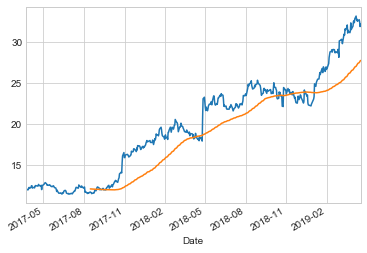

In [10]:
# Piirretään ensin Nesteen päätöskurssit ja niiden liukuva keskiarvo sadalla havainnolla
neste['Closing price'].plot()
neste['Closing price'].rolling(100).mean().plot()

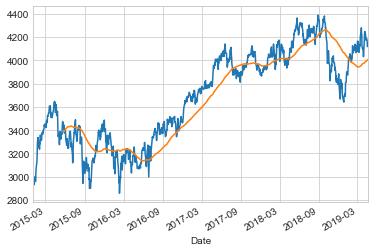

In [11]:
# Indeksin päätösarvot ja liukuva keskiarvo
indeksi['Closing price'].plot()
indeksi['Closing price'].rolling(100).mean().plot()

In [15]:
neste['Neste_Change'] = neste['Closing price'].pct_change()
neste.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Neste_Change
Date,,,,,,,,,,,,
2017-03-22,22.3.2017,12.110,12.117,11.780,12.120,11.773,12.097,11.971,3427125.427,41023215.93,7928,NaN
2017-03-23,23.3.2017,12.127,12.137,12.113,12.177,11.940,12.160,12.092,1916605.917,23175869.95,4651,0.005208
2017-03-24,24.3.2017,12.057,12.063,12.167,12.180,12.010,12.087,12.097,1279636.280,15479979.37,3013,-0.006003
2017-03-27,27.3.2017,11.983,11.990,12.047,12.050,11.910,11.990,11.982,1374178.374,16465539.80,2927,-0.008025
2017-03-28,28.3.2017,12.057,12.063,11.987,12.090,11.953,12.070,12.038,1261228.261,15182499.76,2968,0.006672


In [16]:
indeksi['Indeksi_Change'] = indeksi['Closing price'].pct_change()
indeksi.head()

,Date,High price,Low price,Closing price,Indeksi_Change
Date,,,,,
2015-01-02,2.1.2015,3022.43,2993.02,3007.11,NaN
2015-01-05,5.1.2015,3023.03,2947.22,2947.53,-0.019813
2015-01-07,7.1.2015,2961.35,2920.84,2929.82,-0.006008
2015-01-08,8.1.2015,2986.39,2952.31,2985.03,0.018844
2015-01-09,9.1.2015,3001.76,2958.82,2968.38,-0.005578


In [17]:
muutokset = pd.concat([neste['Neste_Change'], indeksi['Indeksi_Change']], axis=1)
muutokset.head()

,Neste_Change,Indeksi_Change
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,-0.019813
2015-01-07,NaN,-0.006008
2015-01-08,NaN,0.018844
2015-01-09,NaN,-0.005578


In [18]:
# Nesteen ja indeksin muutoksien korrelaatio
muutokset.corr()

,Neste_Change,Indeksi_Change
Neste_Change,1.000000,0.451414
Indeksi_Change,0.451414,1.000000


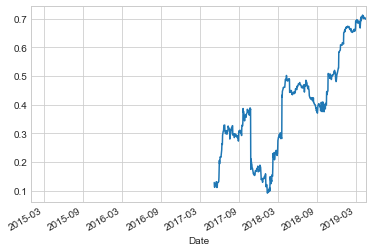

In [22]:
# Liukuva korrelaatio alkaa jostain syystä keskeltä taulukkoa, todennäköisesti siksi, että indeksin tiedot alkavat ennen osakkeen tietoa
korrelaatio=muutokset['Neste_Change'].rolling(100, min_periods=30).corr(muutokset['Indeksi_Change'])
korrelaatio.plot()

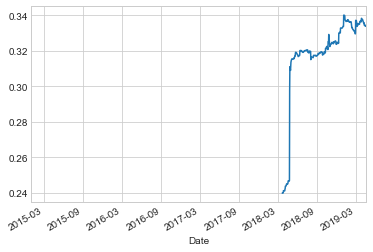

In [33]:
#Volatiliteetin laskeminen
(muutokset['Neste_Change'].rolling(252).std()*(252**0.5)).plot()

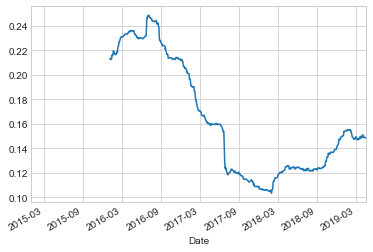

In [24]:
# Markkinoiden volatiliteetin laskeminen
(muutokset['Indeksi_Change'].rolling(252).std()*(252**0.5)).plot()